In [30]:
import pandas as pd
import numpy as np

In [168]:
train = pd.read_csv("D:\PGDBA\Competitions\AirPlaneCrash/train.csv")
test = pd.read_csv("D:\PGDBA\Competitions\AirPlaneCrash/test.csv")

In [169]:
train.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [170]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Severity                   10000 non-null object
Safety_Score               10000 non-null float64
Days_Since_Inspection      10000 non-null int64
Total_Safety_Complaints    10000 non-null int64
Control_Metric             10000 non-null float64
Turbulence_In_gforces      10000 non-null float64
Cabin_Temperature          10000 non-null float64
Accident_Type_Code         10000 non-null int64
Max_Elevation              10000 non-null float64
Violations                 10000 non-null int64
Adverse_Weather_Metric     10000 non-null float64
Accident_ID                10000 non-null int64
dtypes: float64(6), int64(5), object(1)
memory usage: 937.6+ KB


In [171]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 11 columns):
Safety_Score               2500 non-null float64
Days_Since_Inspection      2500 non-null int64
Total_Safety_Complaints    2500 non-null int64
Control_Metric             2500 non-null float64
Turbulence_In_gforces      2500 non-null float64
Cabin_Temperature          2500 non-null float64
Accident_Type_Code         2500 non-null int64
Max_Elevation              2500 non-null float64
Violations                 2500 non-null int64
Adverse_Weather_Metric     2500 non-null float64
Accident_ID                2500 non-null int64
dtypes: float64(6), int64(5)
memory usage: 214.9 KB


In [172]:
train['Severity'] = [1 if x == 'Minor_Damage_And_Injuries' else x for x in train['Severity']]
train['Severity'] = [2 if x == 'Significant_Damage_And_Fatalities' else x for x in train['Severity']]
train['Severity'] = [3 if x == 'Highly_Fatal_And_Damaging' else x for x in train['Severity']]
train['Severity'] = [4 if x == 'Significant_Damage_And_Serious_Injuries' else x for x in train['Severity']]

In [173]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Severity                   10000 non-null int64
Safety_Score               10000 non-null float64
Days_Since_Inspection      10000 non-null int64
Total_Safety_Complaints    10000 non-null int64
Control_Metric             10000 non-null float64
Turbulence_In_gforces      10000 non-null float64
Cabin_Temperature          10000 non-null float64
Accident_Type_Code         10000 non-null int64
Max_Elevation              10000 non-null float64
Violations                 10000 non-null int64
Adverse_Weather_Metric     10000 non-null float64
Accident_ID                10000 non-null int64
dtypes: float64(6), int64(6)
memory usage: 937.6 KB


In [174]:
from sklearn.model_selection import train_test_split
X,y=train.drop(['Accident_ID','Severity'],axis=1),train['Severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

**Random Forest**

In [175]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [176]:
clf = RandomForestClassifier(n_estimators = 350)

In [177]:
sel = SelectFromModel(clf)
sel.fit(X_train, y_train)
selected_feat= X_train.columns[(sel.get_support())]
clf.fit(X_train[selected_feat], y_train)
predict = clf.predict(X_test[selected_feat])

In [41]:
selected_feat

Index(['Safety_Score', 'Days_Since_Inspection', 'Control_Metric',
       'Adverse_Weather_Metric'],
      dtype='object')

In [42]:
clf.fit(X_train,y_train)
predict = clf.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy = accuracy_score(predict, y_test)
confusion_matrix = confusion_matrix(predict, y_test)
print(accuracy)
print(confusion_matrix)

0.936
[[582  15  29  26]
 [  4 401  20   1]
 [ 14   1 705  17]
 [ 10   6  17 652]]


**XGBoost**

In [178]:
from xgboost import XGBClassifier

In [182]:
xgb1 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0.4,
       learning_rate=0.3, max_delta_step=0, max_depth=10,
       min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
       nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)
xgb1.fit(X_train[selected_feat], y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0.4,
       learning_rate=0.3, max_delta_step=0, max_depth=10,
       min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
       nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [183]:
predict = xgb1.predict(X_test[selected_feat])

In [184]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy = accuracy_score(predict, y_test)
confusion_matrix = confusion_matrix(predict, y_test)
print(accuracy)
print(confusion_matrix)
print(classification_report(predict, y_test))

0.9564
[[616   4   7  15]
 [  3 420  15   8]
 [ 11   7 686   7]
 [ 12   8  12 669]]
              precision    recall  f1-score   support

           1       0.96      0.96      0.96       642
           2       0.96      0.94      0.95       446
           3       0.95      0.96      0.96       711
           4       0.96      0.95      0.96       701

   micro avg       0.96      0.96      0.96      2500
   macro avg       0.96      0.96      0.96      2500
weighted avg       0.96      0.96      0.96      2500



**SVM**

In [13]:
from sklearn import svm

In [14]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train[selected_feat],y_train)
predict = clf.predict(X_test[selected_feat])

C:\Users\Bhushan\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy = accuracy_score(predict, y_test)
confusion_matrix = confusion_matrix(predict, y_test)
print(accuracy)
print(confusion_matrix)
print(classification_report(predict, y_test))

0.9408
[[606   4  11  15]
 [  4 387  14   5]
 [ 17  26 739  21]
 [ 10   6  15 620]]
              precision    recall  f1-score   support

           1       0.95      0.95      0.95       636
           2       0.91      0.94      0.93       410
           3       0.95      0.92      0.93       803
           4       0.94      0.95      0.95       651

   micro avg       0.94      0.94      0.94      2500
   macro avg       0.94      0.94      0.94      2500
weighted avg       0.94      0.94      0.94      2500



**XgBoost Parameter Tuning**

In [91]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30,0.50 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]   
}

In [92]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import sklearn as sk

In [93]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [94]:
classifier=XGBClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='f1_weighted',n_jobs=-1,cv=5,verbose=3)

In [95]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   25.3s finished



 Time taken: 0 hours 0 minutes and 26.96 seconds.


In [52]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.5, gamma=0.4,
       learning_rate=0.3, max_delta_step=0, max_depth=10,
       min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [97]:
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 8,
 'learning_rate': 0.25,
 'gamma': 0.1,
 'colsample_bytree': 0.7}

**Prediction**

In [99]:
train_new = train.drop(['Accident_ID','Severity'],axis=1)
xgb1.fit(train_new, train['Severity'])

XGBClassifier(ase_score=0.5, base_score=0.5, booster='gbtree',
       colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
       gamma=0.4, learning_rate=0.3, max_delta_step=0, max_depth=10,
       min_child_weight=5, missing=None, n_estimators=1000, n_jobs=1,
       nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [185]:
#X=test.drop(['Accident_ID'],axis=1)
y = xgb1.predict(test[selected_feat])

In [186]:
submit = pd.DataFrame(test['Accident_ID'])
submit['Severity'] = y

In [187]:
submit.head()

,Accident_ID,Severity
0,1,3
1,10,2
2,14,4
3,17,3
4,21,3


In [188]:
submit['Severity'] = ['Minor_Damage_And_Injuries' if x == 1 else x for x in submit['Severity']]
submit['Severity'] = ['Significant_Damage_And_Fatalities' if x == 2 else x for x in submit['Severity']]
submit['Severity'] = ['Highly_Fatal_And_Damaging' if x == 3 else x for x in submit['Severity']]
submit['Severity'] = ['Significant_Damage_And_Serious_Injuries' if x == 4 else x for x in submit['Severity']]

In [189]:
submit.to_csv('submit.csv', index=False)

# LDA

In [158]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [159]:
lda.explained_variance_ratio_

array([0.76973429, 0.15610844])

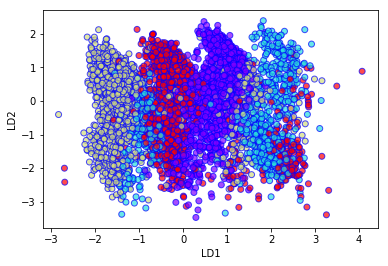

In [160]:
import matplotlib.pyplot as plt 
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_train[:,0],
    X_train[:,1],
    c=y_train,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [161]:
xgb1 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.5, gamma=0.4,
       learning_rate=0.3, max_delta_step=0, max_depth=10,
       min_child_weight=5, missing=None, n_estimators=250, n_jobs=1,
       nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)
xgb1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.5, gamma=0.4,
       learning_rate=0.3, max_delta_step=0, max_depth=10,
       min_child_weight=5, missing=None, n_estimators=250, n_jobs=1,
       nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [162]:
X_train

array([[-1.95096625,  1.36540399],
       [ 0.65398947, -0.13756137],
       [-1.81750229,  0.31904436],
       ...,
       [-1.24921669,  0.01984161],
       [-2.04472827,  0.94535123],
       [-0.38212923, -1.9275635 ]])

In [163]:
y_pred = xgb1.predict(X_test)

In [164]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy = accuracy_score(predict, y_test)
confusion_matrix = confusion_matrix(predict, y_test)
print(accuracy)
print(confusion_matrix)
print(classification_report(predict, y_test))

0.2632
[[168  96 187 168]
 [119  85 128 100]
 [196 136 217 202]
 [170 128 212 188]]
              precision    recall  f1-score   support

           1       0.26      0.27      0.26       619
           2       0.19      0.20      0.19       432
           3       0.29      0.29      0.29       751
           4       0.29      0.27      0.28       698

   micro avg       0.26      0.26      0.26      2500
   macro avg       0.26      0.26      0.26      2500
weighted avg       0.26      0.26      0.26      2500

